In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

In [2]:
df = pd.read_csv("601318.csv",index_col='date', parse_dates=['date'])[['open','close','low','high']]
df

,open,close,low,high
date,,,,
2007-03-01,21.878,20.473,20.040,22.302
2007-03-02,20.565,20.307,20.075,20.758
2007-03-05,20.119,19.419,19.047,20.202
2007-03-06,19.253,19.800,19.143,20.128
2007-03-07,19.817,20.338,19.651,20.522
...,...,...,...,...
2017-12-11,71.200,73.250,70.820,73.310
2017-12-12,73.250,71.210,71.170,73.560
2017-12-13,71.210,72.120,70.200,72.620


In [3]:
# df['ma5'] = np.nan
# df['ma30'] = np.nan

# for i in range(4, len(df)):
#     df.loc[df.index[i],'ma5'] = df['close'][i-4:i+1].mean()

# for i in range(29, len(df)):
#     df.loc[df.index[i],'ma30'] = df['close'][i-29:i+1].mean()
    
df['ma5']=df['open'].rolling(5).mean()
df['ma30']=df['open'].rolling(30).mean()
df

,open,close,low,high,ma5,ma30
date,,,,,,
2007-03-01,21.878,20.473,20.040,22.302,NaN,NaN
2007-03-02,20.565,20.307,20.075,20.758,NaN,NaN
2007-03-05,20.119,19.419,19.047,20.202,NaN,NaN
2007-03-06,19.253,19.800,19.143,20.128,NaN,NaN
2007-03-07,19.817,20.338,19.651,20.522,20.3264,NaN
...,...,...,...,...,...,...
2017-12-11,71.200,73.250,70.820,73.310,69.8580,69.744667
2017-12-12,73.250,71.210,71.170,73.560,70.7280,70.069667
2017-12-13,71.210,72.120,70.200,72.620,70.7900,70.294333


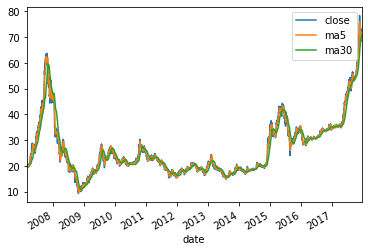

In [4]:
df[['close','ma5','ma30']].plot()
plt.show()

In [5]:
df = df.dropna()
df = df['2010-01-01':]

In [6]:
# golden_cross = []
# death_cross = []
# for i in range(1,len(df)):
#     if df['ma5'][i] >= df['ma30'][i] and df['ma5'][i-1] < df['ma30'][i-1]:
#         golden_cross.append(df.index[i].to_pydatetime())
#     if df['ma5'][i] <= df['ma30'][i] and df['ma5'][i-1] > df['ma30'][i-1]:
#         death_cross.append(df.index[i].to_pydatetime())

sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']

death_cross = df[sr1 & sr2.shift(1)].index
golden_cross = df[~(sr1 | sr2.shift(1))].index

DatetimeIndex(['2010-03-23', '2010-06-24', '2010-12-10', '2011-02-21',
               '2011-03-04', '2011-04-07', '2011-07-01', '2011-10-28',
               '2012-01-16', '2012-04-18', '2012-06-13', '2012-09-13',
               '2012-09-28', '2012-12-10', '2013-04-23', '2013-05-09',
               '2013-08-14', '2013-10-15', '2013-11-04', '2014-01-22',
               '2014-04-02', '2014-05-29', '2014-07-07', '2014-09-09',
               '2014-11-03', '2015-03-17', '2015-05-26', '2015-06-09',
               '2015-09-23', '2015-12-07', '2015-12-18', '2016-03-07',
               '2016-06-01', '2016-07-04', '2016-08-10', '2016-11-01',
               '2017-01-18', '2017-03-27', '2017-04-27', '2017-08-22',
               '2017-10-12', '2017-12-11'],
              dtype='datetime64[ns]', name='date', freq=None)

In [8]:
death_cross

DatetimeIndex(['2010-04-30', '2010-11-17', '2010-12-21', '2011-02-24',
               '2011-03-18', '2011-05-05', '2011-07-25', '2011-11-22',
               '2012-03-09', '2012-06-06', '2012-07-27', '2012-09-18',
               '2012-10-30', '2013-02-26', '2013-04-25', '2013-05-15',
               '2013-10-09', '2013-10-18', '2013-12-24', '2014-01-29',
               '2014-05-21', '2014-06-27', '2014-08-27', '2014-09-15',
               '2015-02-02', '2015-05-19', '2015-06-03', '2015-06-19',
               '2015-12-02', '2015-12-10', '2016-01-06', '2016-05-09',
               '2016-06-28', '2016-08-09', '2016-09-30', '2016-12-21',
               '2017-03-03', '2017-04-14', '2017-08-11', '2017-09-21',
               '2017-12-08'],
              dtype='datetime64[ns]', name='date', freq=None)

In [9]:
golden_cross

DatetimeIndex(['2010-03-23', '2010-06-24', '2010-12-10', '2011-02-21',
               '2011-03-04', '2011-04-07', '2011-07-01', '2011-10-28',
               '2012-01-16', '2012-04-18', '2012-06-13', '2012-09-13',
               '2012-09-28', '2012-12-10', '2013-04-23', '2013-05-09',
               '2013-08-14', '2013-10-15', '2013-11-04', '2014-01-22',
               '2014-04-02', '2014-05-29', '2014-07-07', '2014-09-09',
               '2014-11-03', '2015-03-17', '2015-05-26', '2015-06-09',
               '2015-09-23', '2015-12-07', '2015-12-18', '2016-03-07',
               '2016-06-01', '2016-07-04', '2016-08-10', '2016-11-01',
               '2017-01-18', '2017-03-27', '2017-04-27', '2017-08-22',
               '2017-10-12', '2017-12-11'],
              dtype='datetime64[ns]', name='date', freq=None)

In [7]:
first_money = 100000
money = first_money
hold = 0#持有多少股
sr1 = pd.Series(1, index=golden_cross)
sr2 = pd.Series(0, index=death_cross)
sr = sr1.append(sr2).sort_index()

for i in range(0, len(sr)):
    p = df['open'][sr.index[i]]
    if sr.iloc[i] == 1:
        #金叉
        buy = (money // (100 * p))
        hold += buy*100
        money -= buy*100*p
    else:
        money += hold * p
        hold = 0

p = df['open'][-1]
now_money = hold * p + money

print(now_money - first_money)

175593.89999999997
